In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import array
from pandas import read_csv
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Plot data distribution

### Plot US

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KFUPM/Graduation/data/us_All.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18279 entries, 0 to 18278
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trading_name    18279 non-null  object 
 1   Date            18279 non-null  object 
 2   Low             18279 non-null  float64
 3   Open            18279 non-null  float64
 4   Volume          18279 non-null  int64  
 5   High            18279 non-null  float64
 6   Close           18279 non-null  float64
 7   Adjusted Close  18279 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
df = df.rename(columns={"trading_name ": "trading_name"})

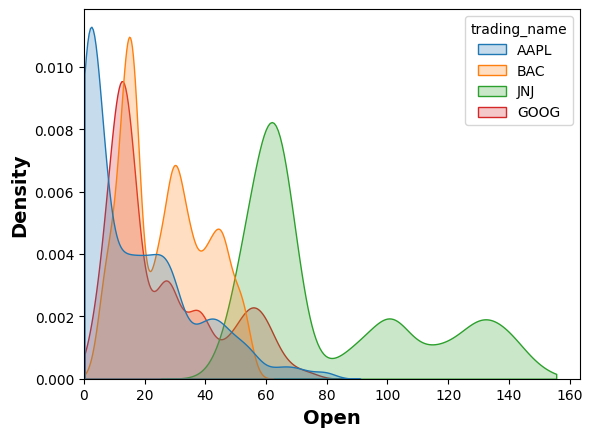

In [ ]:
# Assuming your dataframe is named 'df'
max_value = df['Open'].max()  # Get the maximum value in your data
min_value = df['Open'].min()
# Plot the density plot with KDE clipping
g = sns.kdeplot(data=df, x='Open', hue='trading_name', fill=True, clip=(min_value, max_value))
# Optional: Set x-axis limits
plt.xlabel('Open', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.xlim(left=0)
plt.show()



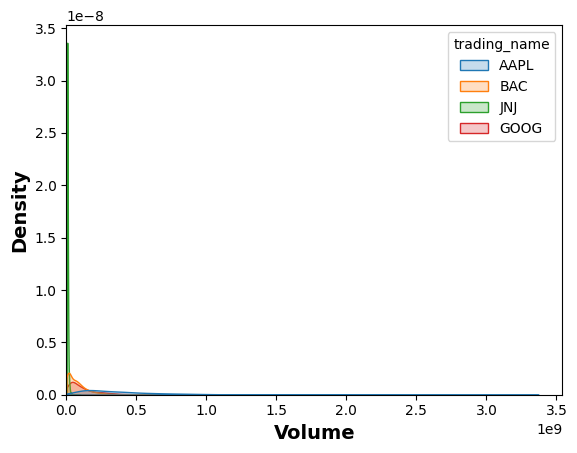

In [ ]:
# Assuming your dataframe is named 'df'
max_value = df['Volume'].max()  # Get the maximum value in your data
min_value = df['Volume'].min()
# Plot the density plot with KDE clipping
g = sns.kdeplot(data=df, x='Volume', hue='trading_name', fill=True, clip=(min_value, max_value))
# Optional: Set x-axis limits
plt.xlabel('Volume', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.xlim(left=0)
plt.show()



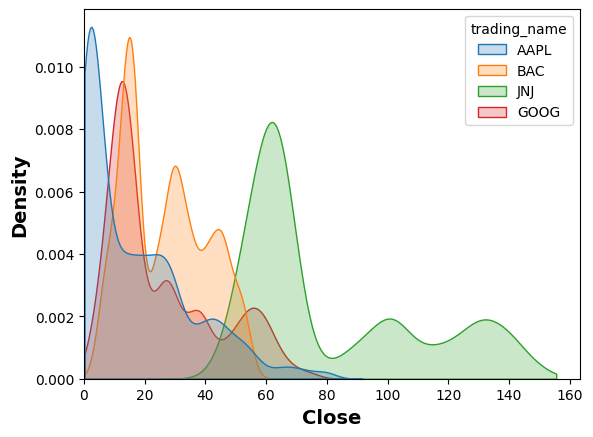

In [ ]:
# Assuming your dataframe is named 'df'
max_value = df['Close'].max()  # Get the maximum value in your data
min_value = df['Close'].min()
# Plot the density plot with KDE clipping
g = sns.kdeplot(data=df, x='Close', hue='trading_name', fill=True, clip=(min_value, max_value))
# Optional: Set x-axis limits
plt.xlabel('Close', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.xlim(left=0)
plt.show()



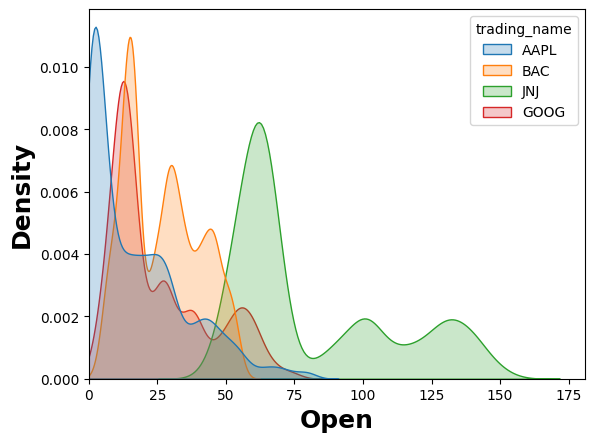

In [ ]:
# Plot the density plot
sns.kdeplot(data=df, x='Open', hue='trading_name', fill=True)
plt.xlabel('Open', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Set x-axis limits to start from 0
plt.xlim(left=0)
plt.show()

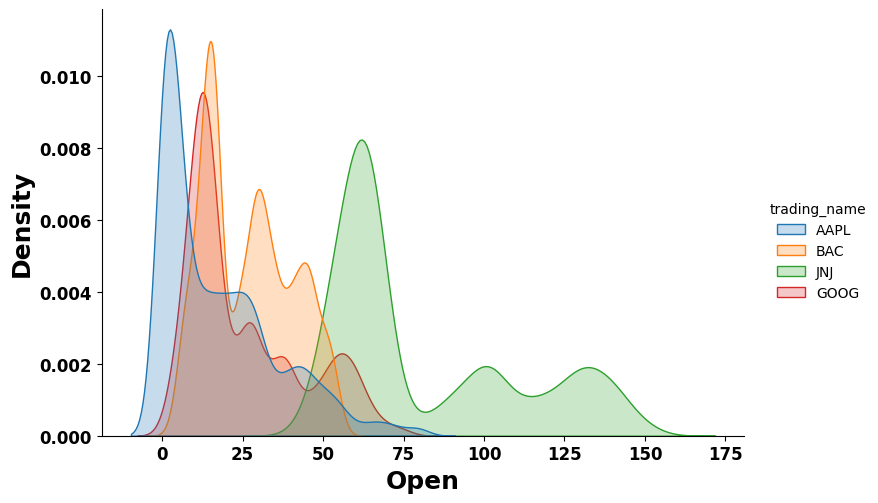

In [ ]:
# Create the displot
g = sns.displot(data=df, x='Open', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('Open', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

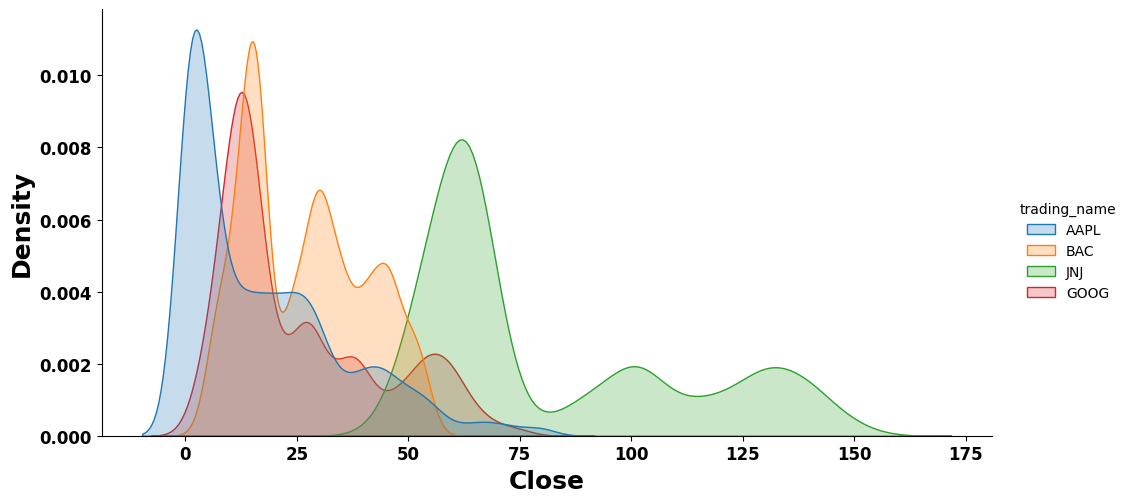

In [ ]:
g = sns.displot(data=df, x='Close', hue='trading_name', kind='kde', fill=True, height=5, aspect=2)
plt.xlabel('Close', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

### Plot Saudi

In [ ]:
df_tadwal = pd.read_csv('/content/drive/MyDrive/KFUPM/Graduation/data/Tadawul_stcks.csv')
df_tadwal = df_tadwal.rename(columns={"trading_name ": "trading_name"})
# subset the DataFrame with a specific value in a column using query()
subset = df_tadwal.query('trading_name in ["ALRAJHI", "SARCO","TASNEE","SPIMACO","SAUDI ELECTRICITY","EMAAR EC","FITAIHI GROUP","ADC","GACO","STC"]')
subset.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [ ]:
subset = subset.drop(subset.columns[[0,1,3,4]], axis = 1)
subset.head()

,trading_name,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,SARCO,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,SARCO,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,SARCO,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,SARCO,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,SARCO,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


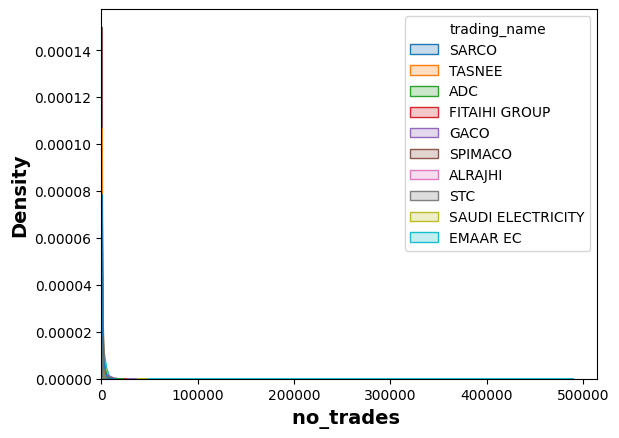

In [ ]:
# Assuming your dataframe is named 'df'
max_value = subset['no_trades '].max()  # Get the maximum value in your data
min_value = subset['no_trades '].min()
# Plot the density plot with KDE clipping
g = sns.kdeplot(data=subset, x='no_trades ', hue='trading_name', fill=True, clip=(min_value, max_value))
# Optional: Set x-axis limits
plt.xlabel('no_trades ', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.xlim(left=0)
plt.show()



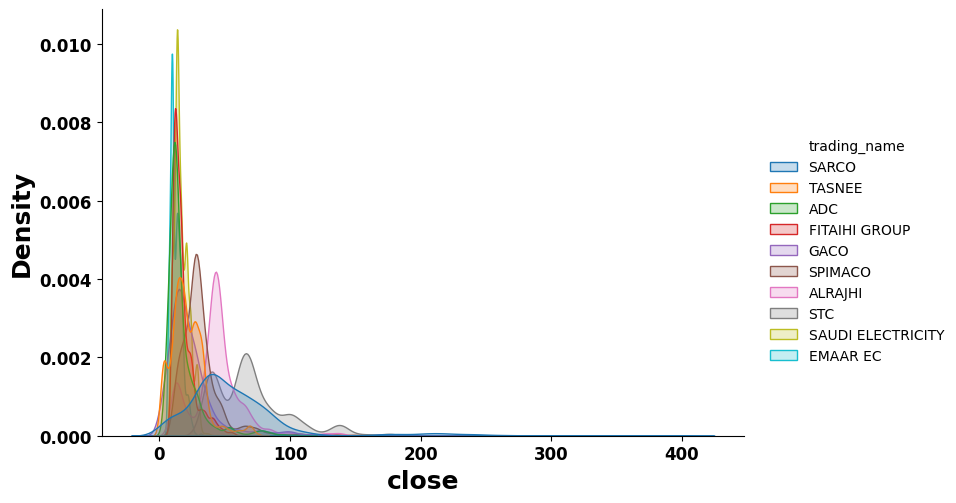

In [ ]:
# Create the displot
g = sns.displot(data=subset, x='close', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('close', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

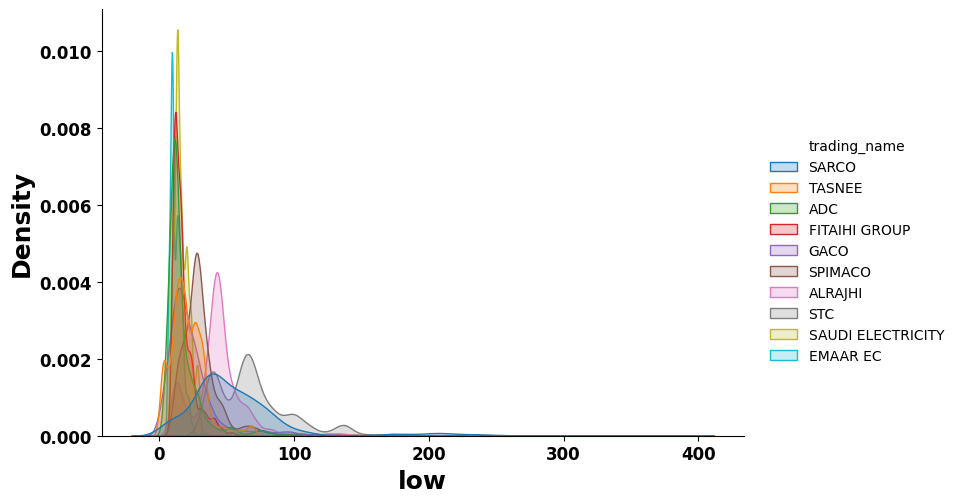

In [ ]:
# Create the displot
g = sns.displot(data=subset, x='low', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('low', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

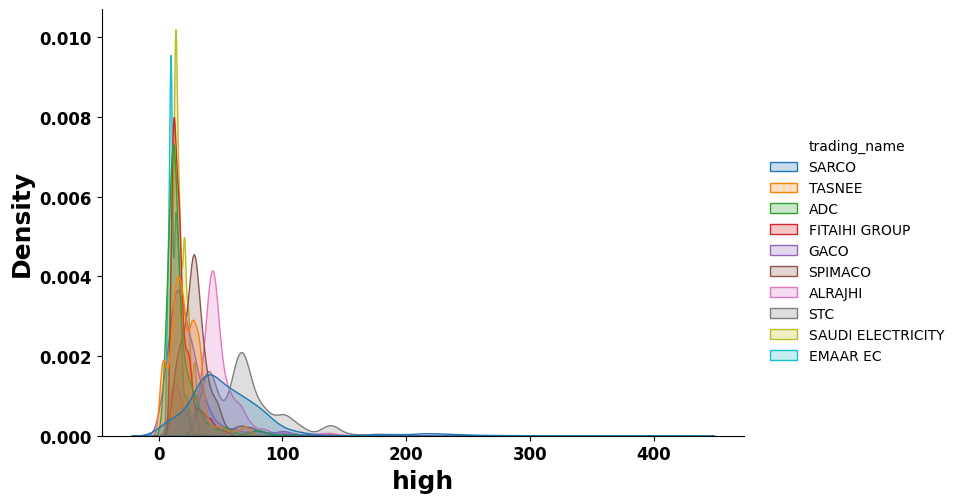

In [ ]:
# Create the displot
g = sns.displot(data=subset, x='high', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('high', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

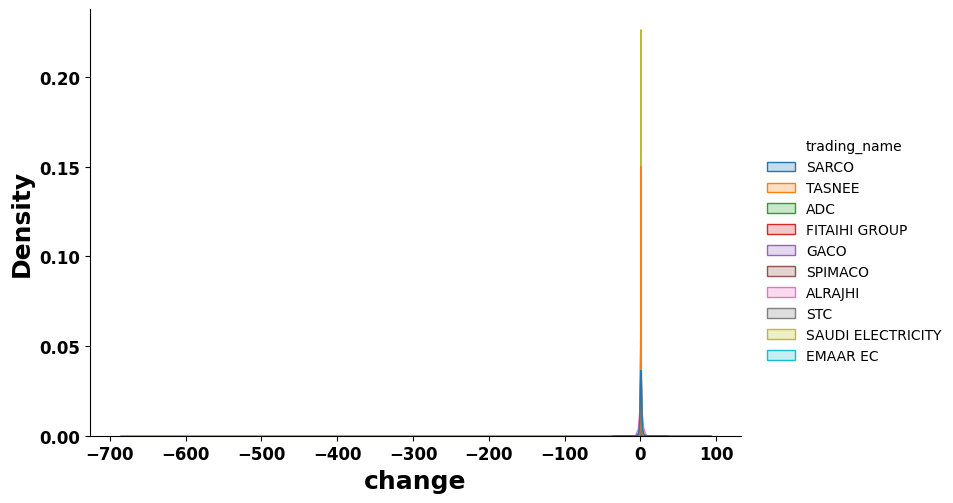

In [ ]:
# Create the displot
g = sns.displot(data=subset, x='change', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('change', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

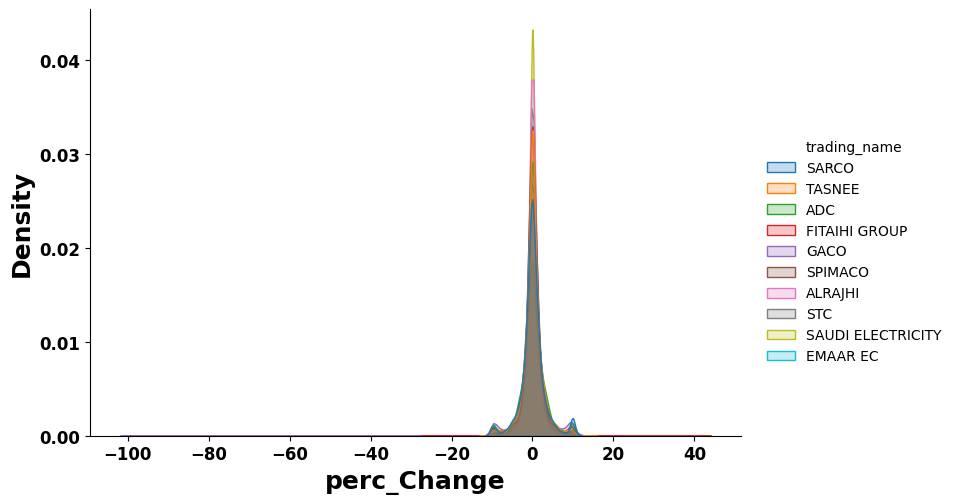

In [ ]:
# Create the displot
g = sns.displot(data=subset, x='perc_Change', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('perc_Change', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

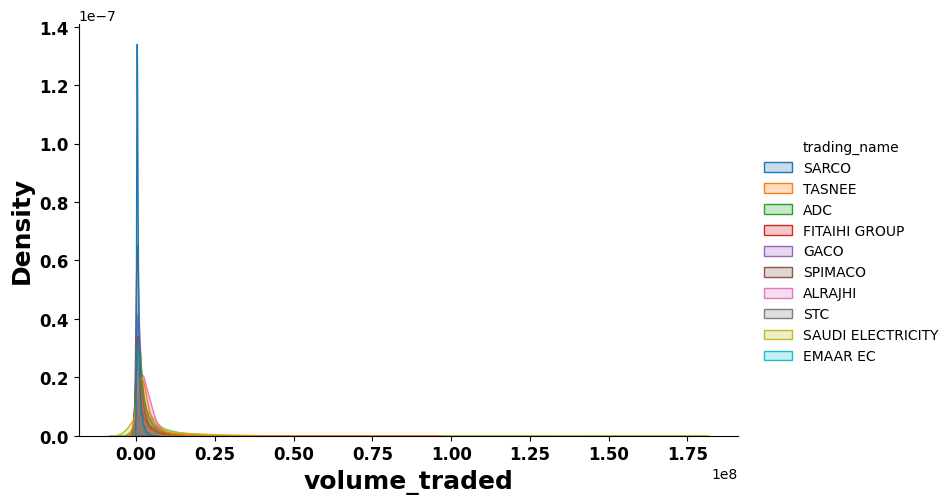

In [ ]:
# Create the displot
g = sns.displot(data=subset, x='volume_traded ', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('volume_traded', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

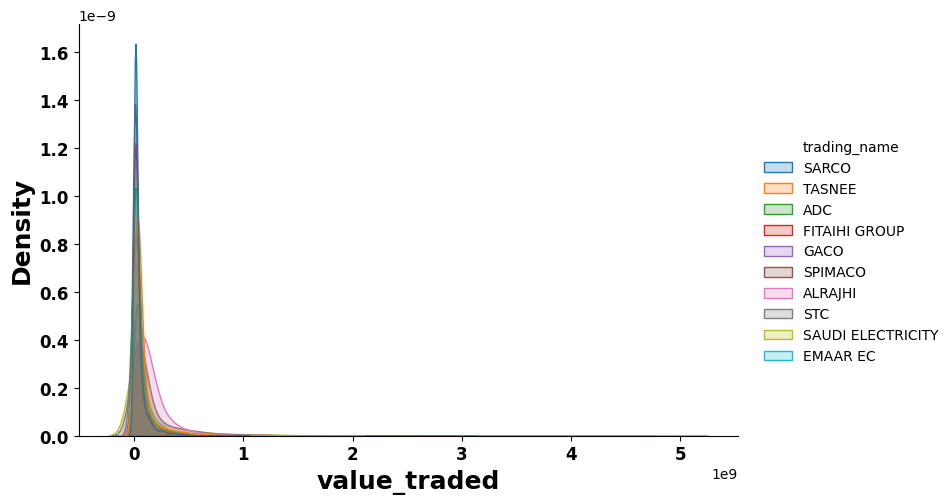

In [ ]:
# Create the displot
g = sns.displot(data=subset, x='value_traded', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('value_traded', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

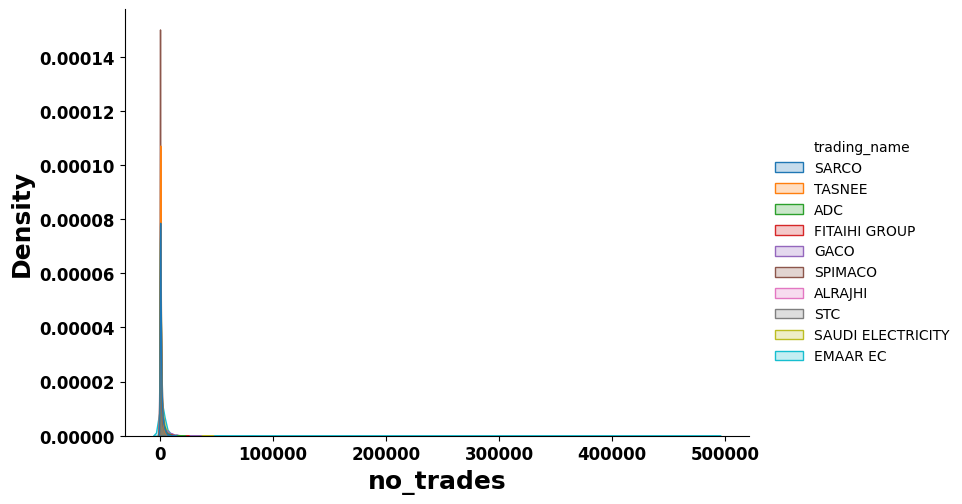

In [ ]:
# Create the displot
g = sns.displot(data=subset, x='no_trades ', hue='trading_name', kind='kde', fill=True, height=5, aspect=1.5)
plt.xlabel('no_trades', fontsize=18, fontweight='bold')
plt.ylabel('Density', fontsize=18, fontweight='bold')
# Make the numbers on the axes bold
g.ax.tick_params(axis='both', which='major', labelsize=12)  # Set the label size
for label in g.ax.get_xticklabels() + g.ax.get_yticklabels():
    label.set_fontweight('bold')  # Make the numbers bold

## Plot models' forcasting

In [ ]:
def true_y_to_evaluation_form(y_true, n_input, n_out):
  y = list()
  in_start = 0
	# step over the entire history one time step at a time
  for _ in range(len(y_true)):
    # define the end of the input sequence
    in_end = in_start + n_input
    out_end = in_end + n_out
    # ensure we have enough data for this instance
    if out_end < len(y_true):
      y.append(y_true[in_end:out_end])
    # move along one time step
    in_start += 1
  return array(y)

def plot_forecasting(y_ts, m1_y_hat, m2_y_hat, m3_y_hat,  m1_label, m2_label, m3_label, m4_label = "", m4_y_hat = []):
  fig = plt.figure(figsize=(15, 7), constrained_layout=True) # rasterized=True
  gs = GridSpec(2, 5, figure=fig, height_ratios=[1.5,1], hspace=0.17)
  dt = ['2017', '2018', '2019', '2020']
  models_name = ""
  if(m4_label == ""):
    models_name = 'Standalone Models'
  elif('Avg' in m1_label):
    models_name = 'Averaging Ensembles'
  elif('ANN' in m1_label):
    models_name = 'ANN Meta-learner Stacking Ensembles'
  elif('GRU' in m1_label):
    models_name = 'GRU Meta-learner Stacking Ensembles'
  else:
    models_name = 'LSTM Meta-learner Stacking Ensembles'

  plt.figtext(0.5, 0.5, f'{models_name} Five-Days Ahead Forecasts', ha='center', va='top', fontweight='bold', fontsize=16)

  if m1_y_hat.size != 1150 * 5:
    raise ValueError(f"Expected 5750 values, but got {m1_y_hat.size}. Check data!")

  y_ts = y_ts.reshape(1150, 5)
  m1_y_hat = m1_y_hat.values.reshape(1150, 5)
  m2_y_hat = m2_y_hat.values.reshape(1150, 5)
  m3_y_hat = m3_y_hat.values.reshape(1150, 5)
  if len(m4_y_hat) > 0:
    m4_y_hat = m4_y_hat.values.reshape(1150, 5)

  for i in range(5):
    ax2 = fig.add_subplot(gs[1, i])
    ax2.plot(y_ts[:, i], color='black', linewidth=0.7, label='Test')
    ax2.plot(m1_y_hat[:, i], color='blue', linestyle = '--', label = m1_label)
    ax2.plot(m2_y_hat[:, i], color='green', linestyle = '-.', label = m2_label)
    ax2.plot(m3_y_hat[:, i], color='orange',  linestyle = ':', label = m3_label)
    if len(m4_y_hat) > 0:
      ax2.plot(m4_y_hat[:, i], color='purple', linewidth=0.7, label = m4_label)

    ax2.set_xticklabels(dt, fontsize=12, rotation=45, ha='left')
    ax2.set_xlabel('Day {}'.format(i+1), fontweight='bold', labelpad=7, size=14)
    ax2.set_ylabel('Close Price', fontweight='bold', labelpad=5, size=14)
    ax2.tick_params(axis='y', labelsize=12)
    for j in ax2.get_xticklabels() + ax2.get_yticklabels(): j.set_fontweight('bold')
    ax2.grid(linestyle=':', linewidth=0.2)
    ax2.autoscale(tight=True)

    # if (i == 5-1):
    #   handles, labels = ax2.get_legend_handles_labels()
    #   by_label = dict(zip(labels, handles))
    #   leg = ax2.legend(by_label.values(), by_label.keys(),loc= (-0.5,-0.6),ncol=10, prop=dict(size=10, weight='bold'))
    #   for h in leg.legendHandles: h.set_linewidth(3)
  plt.show()
  plt.close()


In [ ]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
 one_day = 1
 for row in range(values.shape[0]):
  for col in range(values.shape[1]):
    if np.isnan(values[row, col]):
     values[row, col] = values[row - one_day, col]

def get_actual_test_values(dataset, company_name, start_date):
  company = dataset[(dataset['trading_name '] == company_name)]
  new_date_range = pd.date_range(start=start_date, end="2020-03-05", freq="D")
  company = company.reindex(new_date_range, fill_value=np.NaN)
  company = company.drop(["symbol",'name','trading_name ','sectoer'], axis='columns')
  company.replace('?', np.NaN, inplace=True)
  company = company.astype('float32')
  fill_missing(company.values)
  company_test_info = company.loc['1-1-2017':]
  actual = company_test_info.iloc[:,3]
  actual_to_form = true_y_to_evaluation_form(actual, 5, 5)
  return actual_to_form.flatten()

def inverse_normlization(actual,predicted):
  scaler = StandardScaler()
  scaler.fit(actual)
  predicted_not_normlized = scaler.inverse_transform(predicted)
  predicted_not_normlized_rounded = [np.round(num,2) for num in predicted_not_normlized]
  return predicted_not_normlized_rounded


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/KFUPM/Graduation/data/Tadawul_stcks.csv',index_col='date',parse_dates=True)
dataset.sort_values(by='date', inplace = True)
selected_companies_dic = {"ADC":["ADC","2001-12-31"], "ALRAJHI":["ALRAJHI","2001-12-31"], "GACO":["GACO","2002-01-01"], "EMAAR EC":["EMAAR EC","2006-10-06"], "FITAIHI GROUP":["FITAIHI GROUP","2002-01-26"], "SARCO":["SARCO","2002-01-23"], "SAUDI ELECTRICITY":["SAUDI ELECTRICITY","2002-06-08"], "SPIMACO":["SPIMACO","2001-12-31"], "STC":["STC","2003-01-25"], "TASNEE":["TASNEE","2001-12-31"] }

In [ ]:
for company_key, company_val in selected_companies_dic.items():
  actual = get_actual_test_values(dataset, company_key, selected_companies_dic[company_key][1])
  company_forcasts_normlized = pd.read_csv(f'/content/drive/MyDrive/KFUPM/Graduation/final_experiments/results/Saudi/{company_key}_forcasts_all.csv')
  company_forcasts = pd.DataFrame()
  for col in company_forcasts_normlized.columns[1:]:
    company_forcasts[col] = inverse_normlization(actual.reshape(-1, 1), company_forcasts_normlized[col].values.reshape(-1, 1))
  plot_forecasting( actual, company_forcasts.iloc[:,0],company_forcasts.iloc[:,1],company_forcasts.iloc[:,2],"BiRNN","GRU","LSTM")
  plot_forecasting( actual, company_forcasts.iloc[:,3],company_forcasts.iloc[:,4],company_forcasts.iloc[:,5],"Avg(B,G,L)","Avg(B,G)","Avg(B,L)", "Avg(G,L)",company_forcasts.iloc[:,6])
  plot_forecasting( actual, company_forcasts.iloc[:,7],company_forcasts.iloc[:,8],company_forcasts.iloc[:,9],"Sta_ANN(B,G,L)","Sta_ANN(B,G)","Sta_ANN(B,L)", "Sta_ANN(G,L)",company_forcasts.iloc[:,10])
  plot_forecasting( actual, company_forcasts.iloc[:,11],company_forcasts.iloc[:,12],company_forcasts.iloc[:,13],"Sta_GRU(B,G,L)","Sta_GRU(B,G)","Sta_GRU(B,L)", "Sta_GRU(G,L)",company_forcasts.iloc[:,14])
  plot_forecasting( actual, company_forcasts.iloc[:,15],company_forcasts.iloc[:,16],company_forcasts.iloc[:,17],"Sta_LSTM(B,G,L)","Sta_LSTM(B,G)","Sta_LSTM(B,L)", "Sta_LSTM(G,L)",company_forcasts.iloc[:,18])

AttributeError: 'Legend' object has no attribute 'get_labels'

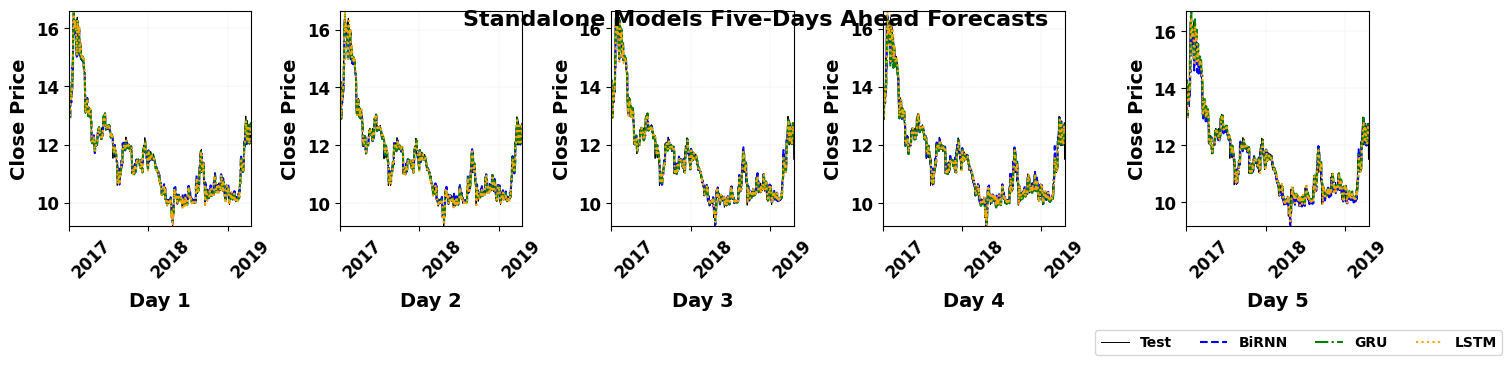

In [ ]:
def plot_forecasting_tag(y_ts, m1_y_hat, m2_y_hat, m3_y_hat,  m1_label, m2_label, m3_label, m4_label = "", m4_y_hat = []):
  fig = plt.figure(figsize=(15, 7), constrained_layout=True) # rasterized=True
  gs = GridSpec(2, 5, figure=fig, height_ratios=[1.5,1], hspace=0.17)
  dt = ['2017', '2018', '2019', '2020']
  models_name = ""
  if(m4_label == ""):
    models_name = 'Standalone Models'
  elif('Avg' in m1_label):
    models_name = 'Averaging Ensembles'
  elif('ANN' in m1_label):
    models_name = 'ANN Meta-learner Stacking Ensembles'
  elif('GRU' in m1_label):
    models_name = 'GRU Meta-learner Stacking Ensembles'
  else:
    models_name = 'LSTM Meta-learner Stacking Ensembles'

  plt.figtext(0.5, 0.5, f'{models_name} Five-Days Ahead Forecasts', ha='center', va='top', fontweight='bold', fontsize=16)

  if m1_y_hat.size != 1150 * 5:
    raise ValueError(f"Expected 5750 values, but got {m1_y_hat.size}. Check data!")

  y_ts = y_ts.reshape(1150, 5)
  m1_y_hat = m1_y_hat.values.reshape(1150, 5)
  m2_y_hat = m2_y_hat.values.reshape(1150, 5)
  m3_y_hat = m3_y_hat.values.reshape(1150, 5)
  if len(m4_y_hat) > 0:
    m4_y_hat = m4_y_hat.values.reshape(1150, 5)

  for i in range(5):
    ax2 = fig.add_subplot(gs[1, i])
    ax2.plot(y_ts[:, i], color='black', linewidth=0.7, label='Test')
    ax2.plot(m1_y_hat[:, i], color='blue', linestyle = '--', label = m1_label)
    ax2.plot(m2_y_hat[:, i], color='green', linestyle = '-.', label = m2_label)
    ax2.plot(m3_y_hat[:, i], color='orange',  linestyle = ':', label = m3_label)
    if len(m4_y_hat) > 0:
      ax2.plot(m4_y_hat[:, i], color='purple', linewidth=0.7, label = m4_label)

    ax2.set_xticklabels(dt, fontsize=12, rotation=45, ha='left')
    ax2.set_xlabel('Day {}'.format(i+1), fontweight='bold', labelpad=7, size=14)
    ax2.set_ylabel('Close Price', fontweight='bold', labelpad=5, size=14)
    ax2.tick_params(axis='y', labelsize=12)
    for j in ax2.get_xticklabels() + ax2.get_yticklabels(): j.set_fontweight('bold')
    ax2.grid(linestyle=':', linewidth=0.2)
    ax2.autoscale(tight=True)

    if (i == 5-1):
      handles, labels = ax2.get_legend_handles_labels()
      by_label = dict(zip(labels, handles))
      leg = ax2.legend(by_label.values(), by_label.keys(),loc= (-0.5,-0.6),ncol=10, prop=dict(size=10, weight='bold'))
      for h in leg.get_labels: h.set_linewidth(3)
  plt.show()
  plt.close()
company_key = "ADC"
actual = get_actual_test_values(dataset, company_key, selected_companies_dic[company_key][1])
company_forcasts_normlized = pd.read_csv(f'/content/drive/MyDrive/KFUPM/Graduation/final_experiments/results/Saudi/{company_key}_forcasts_all.csv')
company_forcasts = pd.DataFrame()
for col in company_forcasts_normlized.columns[1:]:
  company_forcasts[col] = inverse_normlization(actual.reshape(-1, 1), company_forcasts_normlized[col].values.reshape(-1, 1))
plot_forecasting_tag( actual, company_forcasts.iloc[:,0],company_forcasts.iloc[:,1],company_forcasts.iloc[:,2],"BiRNN","GRU","LSTM")
plot_forecasting_tag( actual, company_forcasts.iloc[:,3],company_forcasts.iloc[:,4],company_forcasts.iloc[:,5],"Avg(B,G,L)","Avg(B,G)","Avg(B,L)", "Avg(G,L)",company_forcasts.iloc[:,6])
plot_forecasting_tag( actual, company_forcasts.iloc[:,7],company_forcasts.iloc[:,8],company_forcasts.iloc[:,9],"Sta_ANN(B,G,L)","Sta_ANN(B,G)","Sta_ANN(B,L)", "Sta_ANN(G,L)",company_forcasts.iloc[:,10])
plot_forecasting_tag( actual, company_forcasts.iloc[:,11],company_forcasts.iloc[:,12],company_forcasts.iloc[:,13],"Sta_GRU(B,G,L)","Sta_GRU(B,G)","Sta_GRU(B,L)", "Sta_GRU(G,L)",company_forcasts.iloc[:,14])
plot_forecasting_tag( actual, company_forcasts.iloc[:,15],company_forcasts.iloc[:,16],company_forcasts.iloc[:,17],"Sta_LSTM(B,G,L)","Sta_LSTM(B,G)","Sta_LSTM(B,L)", "Sta_LSTM(G,L)",company_forcasts.iloc[:,18])

## Plot models evaluation with units

In [ ]:
b = pd.read_csv('/content/drive/MyDrive/KFUPM/Graduation/final_experiments/results/Saudi/birnn.csv', index_col="Unit")

In [ ]:
b.head()

,ACD_MAE,ACD_MRE,ACD_RMSE,ACD_R2,ALRAJHI_MAE,ALRAJHI_MRE,ALRAJHI_RMSE,ALRAJHI_R2,EMAAR EC_MAE,EMAAR EC_MRE,...,SPIMACO_RMSE,SPIMACO_R2,STC_MAE,STC_MRE,STC_RMSE,STC_R2,TASNEE_MAE,TASNEE_MRE,TASNEE_RMSE,TASNEE_R2
Unit,,,,,,,,,,,,,,,,,,,,,
2,1.0870,0.0196,1.5321,0.979,0.5349,0.0443,0.8446,0.916,0.2021,0.0170,...,3.9527,0.925,0.4735,0.0290,0.6327,0.945,0.4735,0.0290,0.6327,0.945
3,1.8435,0.0365,2.3220,0.951,0.3383,0.0283,0.4893,0.972,0.1796,0.0152,...,5.8891,0.834,0.3779,0.0234,0.5114,0.964,0.3779,0.0234,0.5114,0.964
4,1.0536,0.0188,1.4797,0.980,0.2781,0.0234,0.3949,0.982,0.1944,0.0163,...,2.5654,0.968,0.4659,0.0286,0.6223,0.947,0.4659,0.0286,0.6223,0.947
8,1.0819,0.0196,1.5260,0.979,0.2762,0.0228,0.4000,0.981,0.1799,0.0151,...,2.6312,0.967,0.4332,0.0267,0.5788,0.954,0.4332,0.0267,0.5788,0.954
9,1.0642,0.0195,1.5027,0.980,0.2879,0.0244,0.4036,0.981,0.1580,0.0133,...,2.2355,0.976,0.3548,0.0217,0.4913,0.967,0.3548,0.0217,0.4913,0.967


In [ ]:
g = pd.read_csv('/content/drive/MyDrive/KFUPM/Graduation/final_experiments/results/Saudi/gru.csv', index_col="Unnamed: 0")

In [ ]:
g.head()

,MAE_8,MRE,RMSE_8,R2_8,MAE_1,MRE.1,RMSE_1,R2_1,MAE_6,MRE.2,...,RMSE_4,R2_4,MAE_10,MRE.8,RMSE_10,R2_10,MAE_3,MRE.9,RMSE_3,R2_3
2,0.4636,0.0415,0.6736,0.787,1.9355,0.0340,3.3114,0.901,0.4652,0.0397,...,1.8203,0.728,3.2609,0.0374,4.7354,0.892,0.5669,0.0332,1.0311,0.853
3,0.4585,0.0347,0.9262,0.597,1.8273,0.0379,2.7915,0.930,0.6659,0.0670,...,1.0110,0.916,3.7592,0.0387,5.9572,0.830,0.7961,0.0557,1.1709,0.811
4,0.4259,0.0318,0.9047,0.615,0.8024,0.0146,1.1346,0.988,0.3917,0.0296,...,0.5948,0.971,1.4647,0.0170,2.1325,0.978,0.8334,0.0445,1.4280,0.719
8,0.1751,0.0149,0.2672,0.966,0.8828,0.0160,1.2461,0.986,0.2339,0.0195,...,0.5921,0.971,1.4950,0.0169,2.2029,0.977,0.3623,0.0223,0.5026,0.965
9,0.1725,0.0147,0.2666,0.967,0.8351,0.0151,1.1892,0.987,0.2401,0.0199,...,0.5604,0.974,1.5524,0.0180,2.1830,0.977,0.3599,0.0221,0.4945,0.966


In [ ]:
l = pd.read_csv('/content/drive/MyDrive/KFUPM/Graduation/final_experiments/results/Saudi/lstm.csv', index_col="Unnamed: 0")

In [ ]:
l.head()

,MAE_8,MRE,RMSE_8,R2_8,MAE_1,MRE.1,RMSE_1,R2_1,MAE_6,MER,...,RMSE_4,R2_4,MAE_10,MRE.7,RMSE_10,R2_10,MAE_3,MRE.8,RMSE_3,R2_3
2,0.4282,0.0350,0.7581,0.730,9.1497,0.1768,10.5250,0.000,2.0831,0.1835,...,1.2475,0.872,7.0417,0.0895,9.2505,0.589,0.5609,0.0355,0.7806,0.916
3,0.4527,0.0410,0.5542,0.856,0.9337,0.0172,1.3154,0.984,0.4821,0.0435,...,1.0335,0.912,3.5749,0.0463,4.5795,0.899,1.0160,0.0557,1.5208,0.681
4,0.2282,0.0194,0.3138,0.954,1.2010,0.0229,1.5895,0.977,0.3842,0.0300,...,1.4436,0.829,2.0413,0.0244,2.8946,0.960,0.6216,0.0382,0.8872,0.891
8,0.1882,0.0160,0.2816,0.963,1.1492,0.0218,1.6078,0.977,0.2519,0.0209,...,0.6071,0.970,3.9521,0.0401,6.3585,0.806,0.3804,0.0231,0.5384,0.960
9,0.1934,0.0165,0.2870,0.961,0.9359,0.0169,1.3490,0.984,0.2492,0.0208,...,0.5810,0.972,1.5570,0.0178,2.2486,0.976,0.3887,0.0240,0.5246,0.962


In [ ]:
def plot_units(model_eval,model_name):
    fig = plt.figure(figsize=(18, 10), constrained_layout=True) # rasterized=True
    gs = GridSpec(2, 4, figure=fig, height_ratios=[1.5,1], hspace=0.17)
    measurments = ["MAE","MRE","RMSE",f"R$^2$"]
    plt.figtext(0.5, 0.5, f"{model_name} Model Evaluation & Units' Number", ha='center', va='top', fontweight='bold', fontsize=18)
    units = [2,16,100,300,700,1024]
    c1 = model_eval.iloc[:,0:4].values
    c2 = model_eval.iloc[:,4:8].values
    c3 = model_eval.iloc[:,8:12].values
    c4 = model_eval.iloc[:,12:16].values
    c5 = model_eval.iloc[:,16:20].values
    c6 = model_eval.iloc[:,20:24].values
    c7 = model_eval.iloc[:,24:28].values
    c8 = model_eval.iloc[:,28:32].values
    c9 = model_eval.iloc[:,32:36].values
    c10 = model_eval.iloc[:,36:40].values
    for i in range(4):
        ax2 = fig.add_subplot(gs[1, i])
        ax2.plot(c1[:, i], color='green', linewidth=1, label='ADC')
        ax2.plot(c2[:, i], color='pink', linewidth=1, label="ALRAJHI")
        ax2.plot(c3[:, i], color='cyan', linewidth=1, label="EMAAR EC")
        ax2.plot(c4[:, i], color='red', linewidth=1, label='FITAIHI GROUP')
        ax2.plot(c5[:, i], color='purple', linewidth=1, label="GACO")
        ax2.plot(c6[:, i], color='blue', linewidth=1, label='SARCO')
        ax2.plot(c7[:, i], color='olive', linewidth=1, label='SE')
        ax2.plot(c8[:, i], color='brown', linewidth=1, label='SPIMACO')
        ax2.plot(c9[:, i], color='gray', linewidth=1, label='STC')
        ax2.plot(c10[:, i], color='orange', linewidth=1, label='TASNEE')
        ax2.set_xticklabels(units, fontsize=12, rotation=45, ha='left')
        ax2.set_xlabel(measurments[i], fontweight='bold', labelpad=7, size=16)
        ax2.set_ylabel('Unit Number', fontweight='bold', labelpad=5, size=16)
        ax2.tick_params(axis='y', labelsize=12)
        for j in ax2.get_xticklabels() + ax2.get_yticklabels(): j.set_fontweight('bold')
        ax2.grid(linestyle=':', linewidth=0.2)
        ax2.autoscale(tight=True)
        if (i == 4-1):
          handles, labels = ax2.get_legend_handles_labels()
          by_label = dict(zip(labels, handles))
          leg = ax2.legend(by_label.values(), by_label.keys(),loc= (-0.5,-0.5) ,ncol=10, prop=dict(size=14, weight='bold'))
          for h in leg.legendHandles: h.set_linewidth(4)
    plt.show()
    plt.close()

In [ ]:
plot_units(b,"(a) BiRNN")

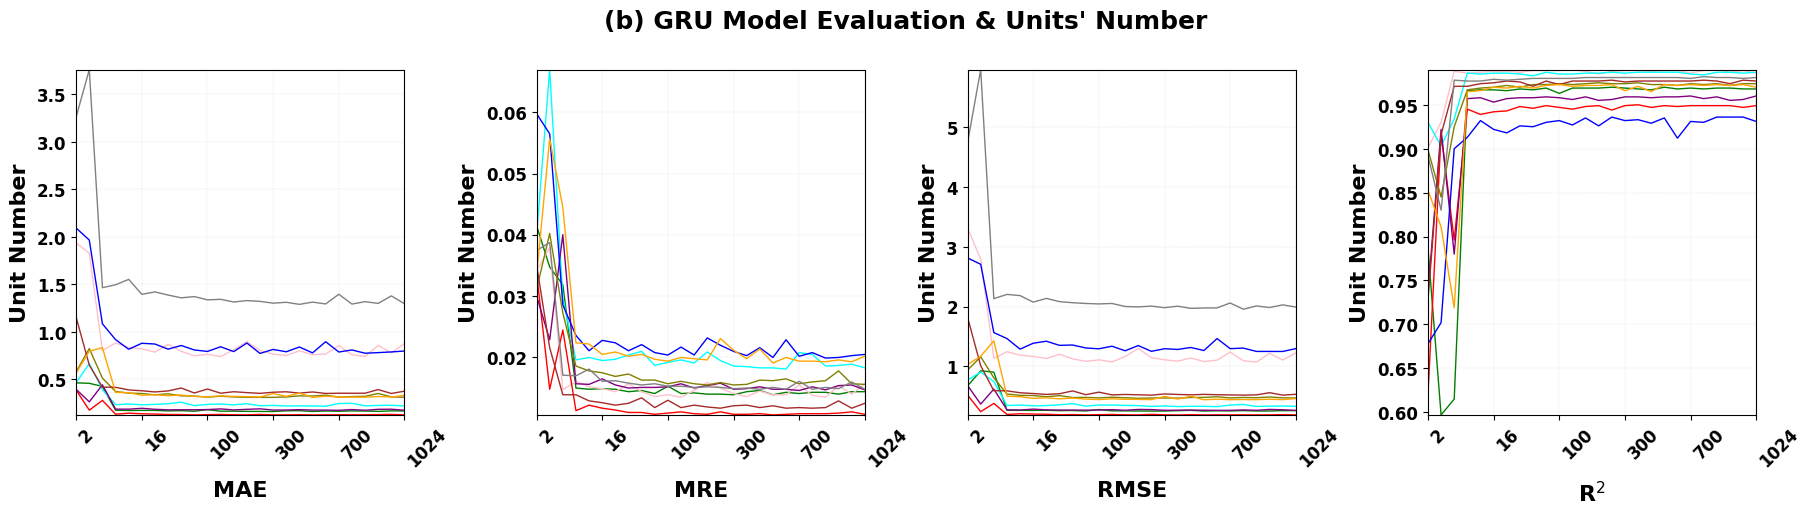

In [ ]:
plot_units(g,"(b) GRU")

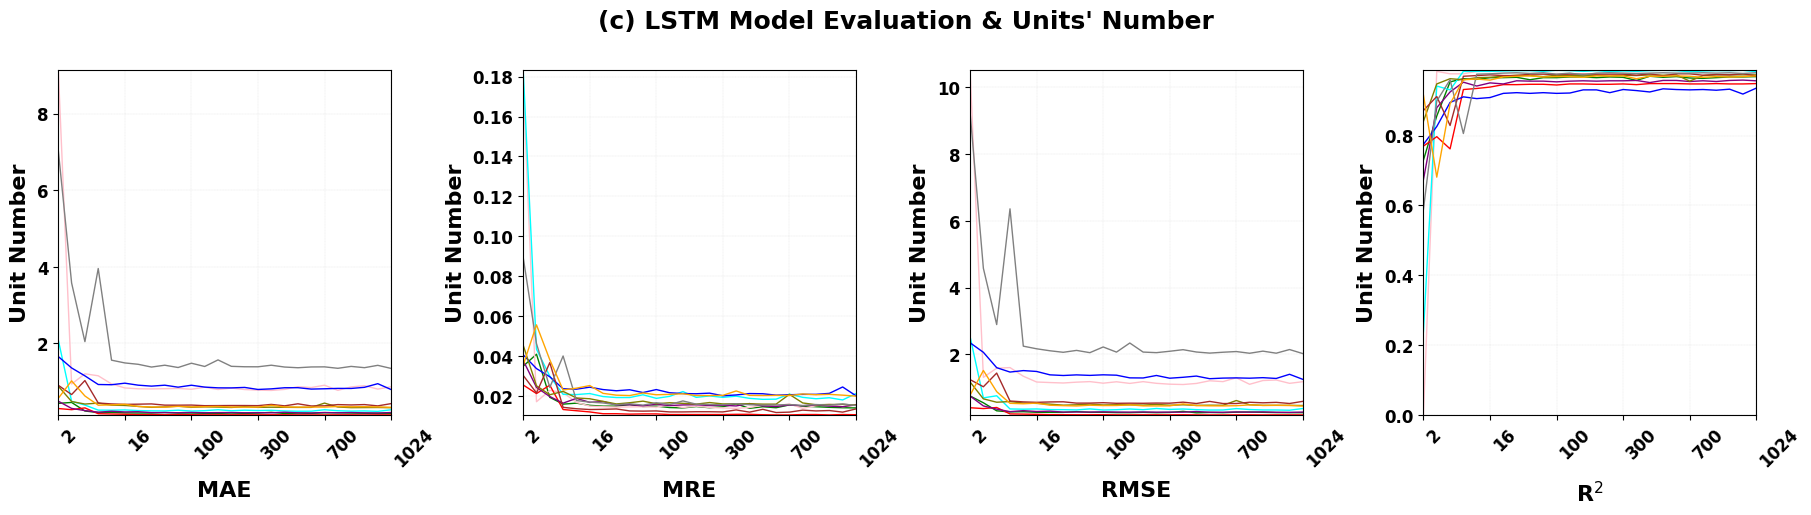

In [ ]:
plot_units(l,"(c) LSTM")

<ipython-input-5-81d179223a25>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(units, fontsize=12, rotation=45, ha='left')


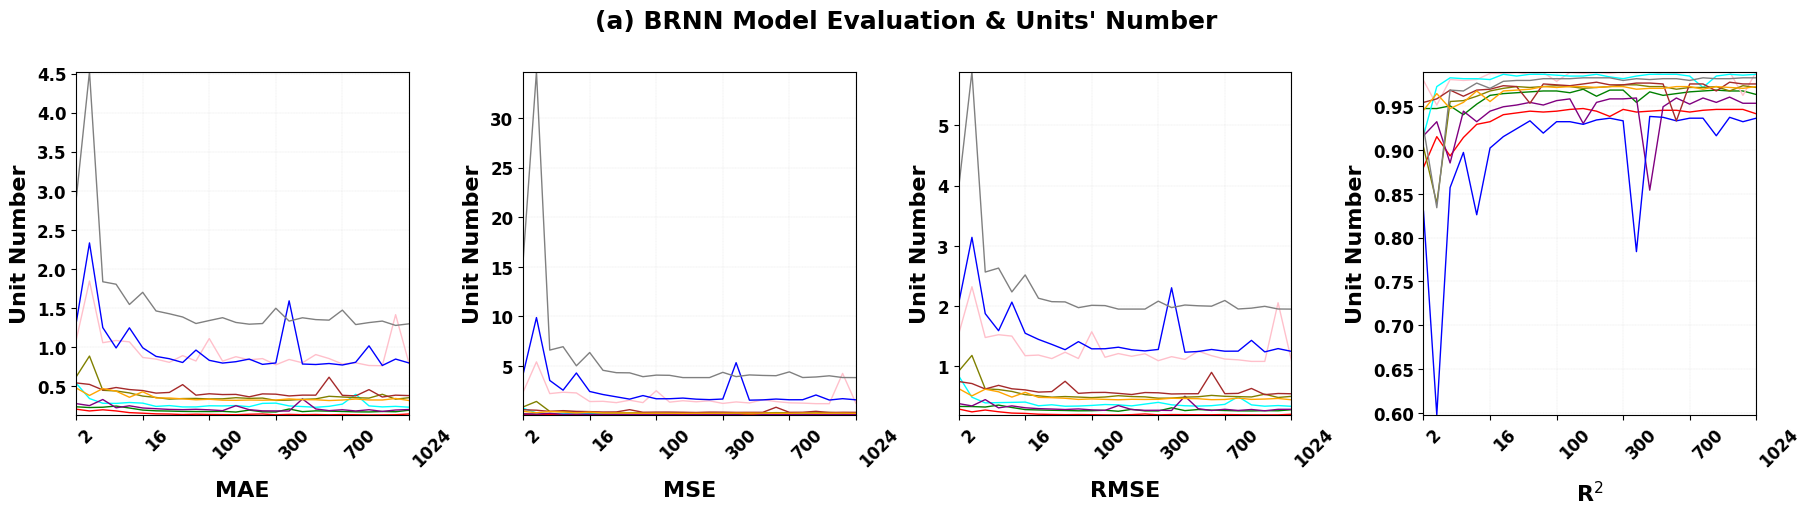

In [ ]:
plot_units(brnn,"(a) BRNN")

In [ ]:
def plot_models(model_eval,model_name):
    fig = plt.figure(figsize=(18, 10), constrained_layout=True) # rasterized=True
    gs = GridSpec(2, 4, figure=fig, height_ratios=[1.5,1], hspace=0.17)
    measurments = ["MAE","MSE","RMSE",f"R$^2$"]
    plt.figtext(0.5, 0.5, f"{model_name} Model Evaluation & Units' Number", ha='center', va='top', fontweight='bold', fontsize=18)
    units = [2,16,100,300,700,1024]
    c1 = model_eval.iloc[:,0:4].values
    c2 = model_eval.iloc[:,4:8].values
    c3 = model_eval.iloc[:,8:12].values
    c4 = model_eval.iloc[:,12:16].values
    c5 = model_eval.iloc[:,16:20].values
    c6 = model_eval.iloc[:,20:24].values
    c7 = model_eval.iloc[:,24:28].values
    c8 = model_eval.iloc[:,28:32].values
    c9 = model_eval.iloc[:,32:36].values
    c10 = model_eval.iloc[:,36:40].values
    for i in range(4):
        ax2 = fig.add_subplot(gs[1, i])
        ax2.plot(c1[:, i], color='green', linewidth=1, label='ACD')
        ax2.plot(c2[:, i], color='pink', linewidth=1, label="ALRAJHI")
        ax2.plot(c3[:, i], color='cyan', linewidth=1, label="EMAAR EC")
        ax2.plot(c4[:, i], color='red', linewidth=1, label='FITAIHI GROUP')
        ax2.plot(c5[:, i], color='purple', linewidth=1, label="GACO")
        ax2.plot(c6[:, i], color='blue', linewidth=1, label='SARCO')
        ax2.plot(c7[:, i], color='olive', linewidth=1, label='SE')
        ax2.plot(c8[:, i], color='brown', linewidth=1, label='SPIMACO')
        ax2.plot(c9[:, i], color='gray', linewidth=1, label='STC')
        ax2.plot(c10[:, i], color='orange', linewidth=1, label='TASNEE')
        ax2.set_xticklabels(units, fontsize=12, rotation=45, ha='left')
        ax2.set_xlabel(measurments[i], fontweight='bold', labelpad=7, size=16)
        ax2.set_ylabel('Unit Number', fontweight='bold', labelpad=5, size=16)
        ax2.tick_params(axis='y', labelsize=12)
        for j in ax2.get_xticklabels() + ax2.get_yticklabels(): j.set_fontweight('bold')
        ax2.grid(linestyle=':', linewidth=0.2)
        ax2.autoscale(tight=True)
        # if (i == 4-1):
        #   handles, labels = ax2.get_legend_handles_labels()
        #   by_label = dict(zip(labels, handles))
        #   leg = ax2.legend(by_label.values(), by_label.keys(),loc= (-0.5,-0.5) ,ncol=10, prop=dict(size=10, weight='bold'))
        #   for h in leg.legendHandles: h.set_linewidth(3)
    plt.show()
    plt.close()